# Task 1

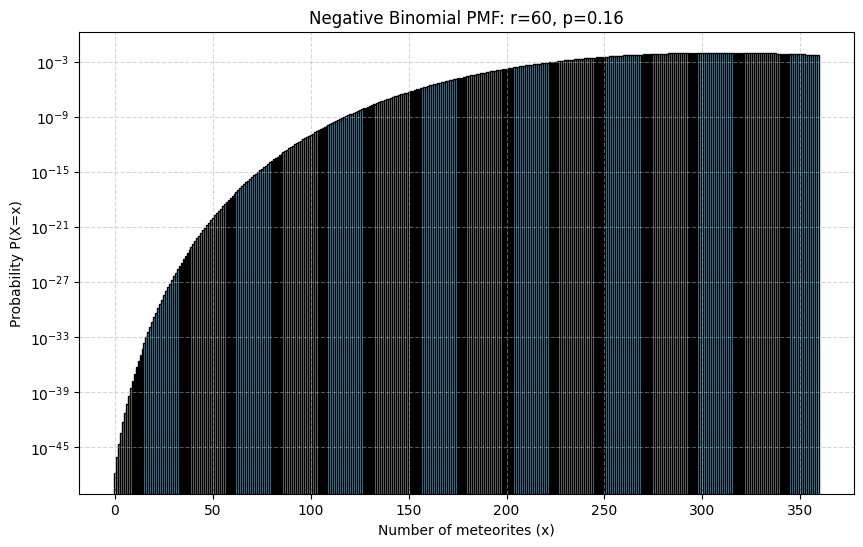

Expected Value E[X] = 315.0
Median (approx) = 313
Max plotted x = 359


In [3]:
"""
Task 1:
X ~ Negative Binomial(k=60, p=0.16).
We plot P(X=x) until probability < 0.5% for higher x.
Then, we compute E[X] and median.
"""

import math
import matplotlib.pyplot as plt

def negative_binomial_pmf(x, r, p):
    # Comb function in Python 3.8+ is 'math.comb'
    from math import comb
    return comb(x + r - 1, x) * (p**r) * ((1 - p)**x)

# Given parameters
r = 60
p = 0.16

# 1) Compute PMFs for x=0..700 (or some large range)
max_x = 700
pmfs = []
for x in range(max_x + 1):
    pmf_x = negative_binomial_pmf(x, r, p)
    pmfs.append(pmf_x)

# 2) Determine the indices where pmf >= 0.005
indices_above_cutoff = [i for i, val in enumerate(pmfs) if val >= 0.005]

if indices_above_cutoff:
    max_plot_x = max(indices_above_cutoff)
else:
    # If none are >= 0.005 (which might happen for large r), we can 
    # plot a region around the peak of the distribution.
    max_plot_x = 400  # or some fallback

# 3) Compute the median: the smallest m such that sum_{x=0..m} pmf(x) >= 0.5
cdf = 0.0
median_x = None
for i, val in enumerate(pmfs):
    cdf += val
    if cdf >= 0.5:
        median_x = i
        break

# 4) Prepare data for plotting
x_values = range(max_plot_x + 1)
pmf_values = pmfs[:max_plot_x + 1]

# 5) Plot
plt.figure(figsize=(10, 6))
plt.bar(x_values, pmf_values, width=0.9, color='skyblue', edgecolor='black')
plt.title(f"Negative Binomial PMF: r={r}, p={p}")
plt.xlabel("Number of meteorites (x)")
plt.ylabel("Probability P(X=x)")
plt.yscale('log')  # useful for wide-ranging probabilities
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

# 6) Print key metrics
expectation = r * (1 - p) / p
print("Expected Value E[X] =", expectation)
print("Median (approx) =", median_x)
print("Max plotted x =", max_plot_x)


# Task 2

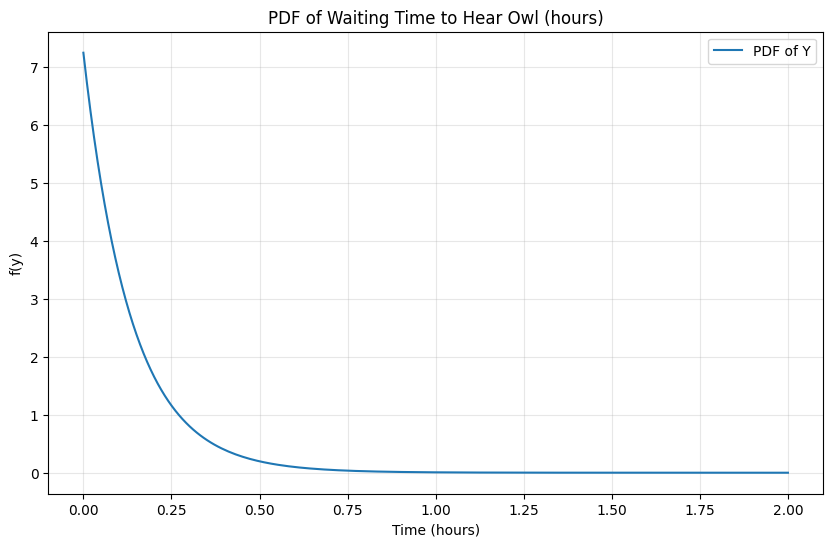

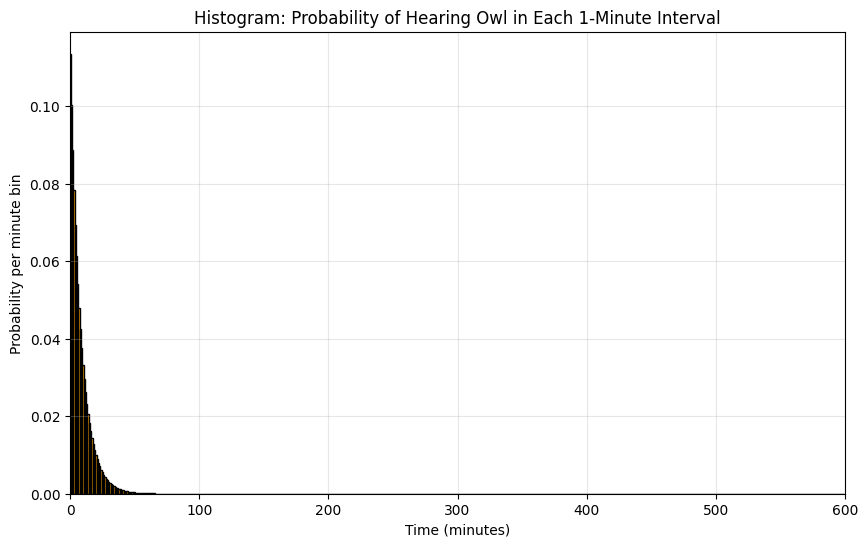

Task 2 Results
--------------
P(2 < Y < 4) = 0.00000
Mean of Y (hours) = 0.13792
Variance of Y (hours^2) = 0.02018
Quartiles (hours): Q1=0.03805, Median=0.09396, Q3=0.19050


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

# Given parameters
xi4 = 0
xi5 = 0.34
xi6 = 6
xi7 = 0.65
xi8 = 8

# =========== 1) Define survival, CDF, and PDF =============

def survival(y):
    """ S(y) = P(Y > y) """
    return xi5*np.exp(-xi6*y) + xi7*np.exp(-xi8*y)

def cdf(y):
    """ F(y) = 1 - S(y) """
    return 1 - survival(y)

def pdf(y):
    """ f(y) = derivative of F(y) """
    # Could also do: - derivative of survival
    return (xi5*xi6)*np.exp(-xi6*y) + (xi7*xi8)*np.exp(-xi8*y)

# =========== 2) Probability P(2 < Y < 4) ==================

P_2_4 = cdf(4) - cdf(2)

# =========== 3) Mean & Variance (Analytic) ================

# Mixture of two exponentials => mean = w1*(1/lambda1) + w2*(1/lambda2)
meanY = xi5*(1/xi6) + xi7*(1/xi8)

# Second moment E[Y^2] = sum_i w_i * 2/lambda_i^2
E_Y2 = xi5*(2/(xi6**2)) + xi7*(2/(xi8**2))
varY = E_Y2 - meanY**2

# =========== 4) Quartiles (numerical) =====================

def find_quantile(q):
    """ Solve F(y)=q by simple numerical bisection. """
    # We assume y>=0
    left, right = 0.0, 10.0  # Start with an upper guess of 10 hours
    # Expand right if needed
    while cdf(right) < q:
        right *= 2  # double
    for _ in range(100):
        mid = 0.5*(left + right)
        if cdf(mid) < q:
            left = mid
        else:
            right = mid
    return 0.5*(left + right)

q1 = find_quantile(0.25)
median = find_quantile(0.50)
q3 = find_quantile(0.75)

# =========== 5) Plot the PDF (continuous) =================

y_vals = np.linspace(0, 2.0, 200)  # e.g., 0 to 2 hours
f_vals = [pdf(y) for y in y_vals]

plt.figure(figsize=(10,6))
plt.plot(y_vals, f_vals, label="PDF of Y")
plt.title("PDF of Waiting Time to Hear Owl (hours)")
plt.xlabel("Time (hours)")
plt.ylabel("f(y)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# =========== 6) Histogram by the minute ===================
# We interpret "bar represents the probability of hearing the owl
# at any particular minute" => we want P(Y in [m, m+1 minute]).
# We'll do from 0 minutes to 600 minutes (10 hours) for example:

max_minutes = 600
mins = np.arange(0, max_minutes+1)  # minute marks
# Convert minutes -> hours:
hours = mins / 60.0

# Probability in each 1-minute bin = F((m+1)/60) - F(m/60)
hist_probs = []
for m in range(max_minutes):
    t1 = m/60.0
    t2 = (m+1)/60.0
    prob_bin = cdf(t2) - cdf(t1)
    hist_probs.append(prob_bin)

# Make a bar plot
plt.figure(figsize=(10,6))
plt.bar(mins[:-1], hist_probs, width=1.0, color='orange', edgecolor='black')
plt.title("Histogram: Probability of Hearing Owl in Each 1-Minute Interval")
plt.xlabel("Time (minutes)")
plt.ylabel("Probability per minute bin")
plt.xlim(0, max_minutes)
plt.grid(True, alpha=0.3)
plt.show()

# =========== 7) Print out results =========================

print("Task 2 Results")
print("--------------")
print(f"P(2 < Y < 4) = {P_2_4:.5f}")
print(f"Mean of Y (hours) = {meanY:.5f}")
print(f"Variance of Y (hours^2) = {varY:.5f}")
print(f"Quartiles (hours): Q1={q1:.5f}, Median={median:.5f}, Q3={q3:.5f}")


# Task 3

In [5]:
import numpy as np

# 1) Our data sample of T_i
data = np.array([88, 21, 194, 60, 37])  # from xi10
n = len(data)

# 2) The MLE for theta
theta_hat = np.sum(data) / (2*n)

# 3) Expected value of T with that estimate
E_T = 2 * theta_hat

print("Data T_i =", data)
print("Sum of T_i =", np.sum(data))
print("n =", n)
print("MLE of theta =", theta_hat)
print("Estimated E[T] =", E_T)

# Optionally: check the log-likelihood at the MLE
def gamma2_pdf(t, theta):
    # shape=2, scale=theta => f_T(t) = 1/theta^2 * t * exp(-t/theta) for t>0
    return (1/(theta**2)) * t * np.exp(-t/theta) if t>0 else 0.0

def log_likelihood(theta, data):
    eps = 1e-12
    ll = 0
    for x in data:
        ll += np.log(gamma2_pdf(x, theta) + eps)
    return ll

logL_at_MLE = log_likelihood(theta_hat, data)
print("Log-likelihood at MLE =", logL_at_MLE)


Data T_i = [ 88  21 194  60  37]
Sum of T_i = 400
n = 5
MLE of theta = 40.0
Estimated E[T] = 80.0
Log-likelihood at MLE = -26.393814653433097


# Task 4

In [6]:
import numpy as np
from math import sqrt

data = np.array([896,873,826,814,908,853,866,842,870,879], dtype=float)
n = len(data)

mean_new = np.mean(data)
var_new = np.var(data, ddof=1)  # sample variance with Bessel's correction
std_new = sqrt(var_new)

print("Sample size n =", n)
print("Sample mean =", mean_new)
print("Sample variance =", var_new)
print("Sample std dev =", std_new)
import scipy.stats as st

alpha = 0.05
df = n - 1  # = 9

# Lower-tail critical value
chi2_crit = st.chi2.ppf(alpha, df)

# Compute test statistic
sigma0 = 92.2
chi2_stat = (df * var_new) / (sigma0**2)

print("Chi-square critical value (5% lower tail, df=9) =", chi2_crit)
print("Chi-square test statistic =", chi2_stat)

if chi2_stat < chi2_crit:
    print("Reject H0 => the new system has significantly smaller variance")
else:
    print("Fail to reject H0 => not enough evidence for smaller variance")


Sample size n = 10
Sample mean = 862.7
Sample variance = 870.9000000000001
Sample std dev = 29.5110148927481
Chi-square critical value (5% lower tail, df=9) = 3.325112843066815
Chi-square test statistic = 0.9220382926863698
Reject H0 => the new system has significantly smaller variance


# Task 5

Number of data points = 22

OLS Coefficients (alpha_ols):
  alpha_0 = 3.54947e+12
  alpha_1 = -5.59476e+12
  alpha_2 = 1.54411e+11
  alpha_3 = 2.99405e+11
  alpha_4 = -1.38924e+10
  alpha_5 = -3.94842e+09
  alpha_6 = 1.90716e+08
  alpha_7 = 1.88492e+07
  alpha_8 = -917038
  alpha_9 = -29594.6
  alpha_10 = 1454.77

Ridge (lambda=1e-10):
  alpha_0 = 3.54947e+12
  alpha_1 = -5.59476e+12
  alpha_2 = 1.54411e+11
  alpha_3 = 2.99405e+11
  alpha_4 = -1.38924e+10
  alpha_5 = -3.94842e+09
  alpha_6 = 1.90716e+08
  alpha_7 = 1.88492e+07
  alpha_8 = -917038
  alpha_9 = -29594.6
  alpha_10 = 1454.77

Ridge (lambda=1.0):
  alpha_0 = 2.48491e+12
  alpha_1 = -5.30424e+12
  alpha_2 = 2.0927e+11
  alpha_3 = 2.9011e+11
  alpha_4 = -1.4525e+10
  alpha_5 = -3.86401e+09
  alpha_6 = 1.93328e+08
  alpha_7 = 1.85526e+07
  alpha_8 = -920498
  alpha_9 = -29236.6
  alpha_10 = 1454.42

Ridge (lambda=10000.0):
  alpha_0 = 9.33487e+08
  alpha_1 = -9.95047e+09
  alpha_2 = 1.80222e+10
  alpha_3 = 1.03295e+11
  alpha_

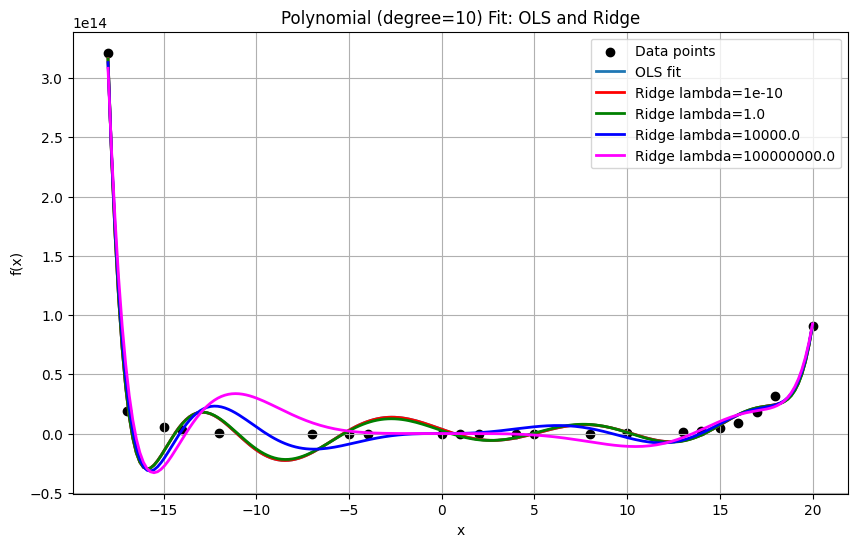

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy import linalg

# ===========================
# 1) DATA
# ===========================
data_points = [
    (-7, 2729975670.56),
    ( 0, 0),
    (-14, 2655071798647.19),
    ( 4, 6445810.43),
    (-15, 5379699892330.31),
    ( 1, -3.07),
    ( 8, 8048961878.2),
    ( 2, 2094.55),
    (14, 2500392671685.05),
    (16, 9271053500819.05),
    (-17, 18735416871460.35),
    (15, 4695281440153.17),
    (10, 77494923859.58),
    (13, 1145293969014.17),
    (-5, 105193881.25),
    (-18, 321351338645194.16),
    (-12, 572634601195.49),
    ( 5, 63331861.18),
    (17, 17755749005062.69),
    (20, 90823629800260.56),
    (18, 31478660656929.07),
    (-4, 11802988.75)
]

xy = np.array(data_points, dtype=np.float64)
X_raw = xy[:, 0]
y = xy[:, 1]
n = len(X_raw)
print("Number of data points =", n)

# ===========================
# 2) BUILD DESIGN MATRIX for 10th-degree polynomial
# f(x)= alpha0 + alpha1*x + ... + alpha10*x^10
# ===========================
degree = 10
X = np.zeros((n, degree+1))
for j in range(degree+1):
    X[:, j] = X_raw**j

# ===========================
# 3) OLS via Normal Equation
# alpha_ols = (X^T X)^{-1} X^T y
# ===========================
XtX = X.T @ X
Xty = X.T @ y
alpha_ols = inv(XtX) @ Xty

print("\nOLS Coefficients (alpha_ols):")
for i, coeff in enumerate(alpha_ols):
    print(f"  alpha_{i} = {coeff:.6g}")

# ===========================
# 4) Ridge Solutions
# alpha_ridge = (X^T X + lambda I)^{-1} X^T y
# We'll illustrate for multiple lambda values
# ===========================
lambda_candidates = [1e-10, 1.0, 1e4, 1e8]
ridge_solutions = {}

for lam in lambda_candidates:
    A = XtX + lam * np.eye(degree+1)
    alpha_ridge = inv(A) @ Xty
    
    print(f"\nRidge (lambda={lam}):")
    for i, coeff in enumerate(alpha_ridge):
        print(f"  alpha_{i} = {coeff:.6g}")

    # Store the solution for plotting
    ridge_solutions[lam] = alpha_ridge

# ===========================
# 5) HELPER: Evaluate polynomial with given coefficients
# ===========================
def poly_eval(alpha, x):
    # alpha_0 + alpha_1*x + ... + alpha_d*x^d
    # alpha is length (degree+1)
    # x can be scalar or numpy array
    deg = len(alpha)-1
    terms = [alpha[j]*x**j for j in range(deg+1)]
    return np.sum(terms, axis=0)

# ===========================
# 6) PLOT: data + fitted polynomials
# ===========================
plt.figure(figsize=(10,6))

# Plot the raw data
plt.scatter(X_raw, y, color='black', label='Data points')

# Generate a grid for x to plot the curves
xmin, xmax = X_raw.min(), X_raw.max()
x_plot = np.linspace(xmin, xmax, 200)

# Evaluate and plot OLS
y_plot_ols = poly_eval(alpha_ols, x_plot)
plt.plot(x_plot, y_plot_ols, label='OLS fit', linewidth=2)

# Evaluate and plot each Ridge solution
colors = ['red','green','blue','magenta']
for lam, c in zip(lambda_candidates, colors):
    alpha_r = ridge_solutions[lam]
    y_plot_ridge = poly_eval(alpha_r, x_plot)
    plt.plot(x_plot, y_plot_ridge, color=c, 
             label=f'Ridge lambda={lam}', linewidth=2)

plt.title("Polynomial (degree=10) Fit: OLS and Ridge")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


# Task 6

Posterior distribution of θ is Gamma(shape=71.0000, rate=492.1000)
b) Bayes estimate of θ (posterior mean)        = 0.144280
c) Bayes estimate of θ (posterior mode, MAP)   = 0.142248


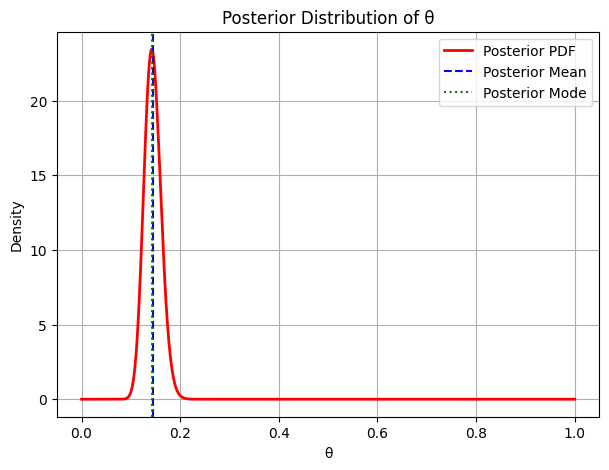

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

def bayesian_estimates_gamma(
    prior_alpha, 
    prior_beta, 
    sample_shape, 
    sample_size, 
    sample_mean
):
    """
    Given:
      - prior_alpha, prior_beta: shape and *rate* of the Gamma prior on θ
      - sample_shape: shape parameter α=3 of Gamma distribution for each x
      - sample_size: number of observations n
      - sample_mean: observed sample mean x̄
      
    Returns:
      - post_alpha: posterior shape parameter
      - post_beta: posterior rate parameter
      - posterior_mean: Bayes estimate under quadratic loss
      - posterior_mode: Bayes estimate using the posterior mode (MAP)
    """
    # 1) Sum of observations:
    sum_x = sample_size * sample_mean
    
    # 2) Posterior parameters for θ (Gamma is conjugate to Gamma likelihood):
    #    posterior shape = prior_alpha + n * (data shape)
    #    posterior rate  = prior_beta  + sum of data
    post_alpha = prior_alpha + sample_size * sample_shape
    post_beta  = prior_beta  + sum_x
    
    # 3) Bayes estimate under squared error loss = posterior mean
    posterior_mean = post_alpha / post_beta
    
    # 4) Bayes estimate using posterior mode = (post_alpha - 1) / post_beta (if post_alpha > 1)
    if post_alpha > 1:
        posterior_mode = (post_alpha - 1) / post_beta
    else:
        # If post_alpha <= 1, the mode is at 0, but that won't occur here with large alpha
        posterior_mode = 0.0  
    
    return post_alpha, post_beta, posterior_mean, posterior_mode

def main():
    # --------------------------------------------------
    # Task 6 parameters (ξ₁₇, ξ₁₈, ξ₁₉) from your statement
    # --------------------------------------------------
    xi17 = 41    # prior shape
    xi18 = 29    # prior rate
    xi19 = 46.31 # observed sample mean
    
    # Number of observations (given: n=10)
    n = 10
    # Data distribution shape = α=3
    sample_shape = 3
    
    # --------------------------------------------------
    # a) Posterior distribution of θ
    # --------------------------------------------------
    post_alpha, post_beta, post_mean, post_mode = bayesian_estimates_gamma(
        prior_alpha   = xi17,
        prior_beta    = xi18,
        sample_shape  = sample_shape,
        sample_size   = n,
        sample_mean   = xi19
    )
    
    # Print results
    print("Posterior distribution of θ is Gamma(shape={:.4f}, rate={:.4f})"
          .format(post_alpha, post_beta))
    print("b) Bayes estimate of θ (posterior mean)        = {:.6f}".format(post_mean))
    print("c) Bayes estimate of θ (posterior mode, MAP)   = {:.6f}".format(post_mode))
    
    # --------------------------------------------------
    # (Optional) Plotting the posterior distribution
    # --------------------------------------------------
    # In scipy, gamma(shape=a, scale=1/b) if we want a 'rate' = b
    # so pass `a=post_alpha` and `scale=1/post_beta`.
    x_vals = np.linspace(0, 1.0, 1000)  # Adjust range as needed
    posterior_pdf = gamma.pdf(x_vals, a=post_alpha, scale=1.0/post_beta)
    
    plt.figure(figsize=(7,5))
    plt.plot(x_vals, posterior_pdf, 'r-', lw=2, label='Posterior PDF')
    plt.axvline(post_mean, color='blue', linestyle='--', label='Posterior Mean')
    plt.axvline(post_mode, color='green', linestyle=':', label='Posterior Mode')
    plt.title('Posterior Distribution of θ')
    plt.xlabel('θ')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
